Task #3 - import required packages with their customary aliases

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

Task #4 Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [5]:
gdp_df = pd.read_csv('..\data\gdp_percapita.csv')

In [6]:
print(gdp_df.head())

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2020  1970.560169              NaN
1     Afghanistan  2019  2065.036235              NaN
2     Afghanistan  2018  2033.804389              NaN
3     Afghanistan  2017  2058.400221              NaN
4     Afghanistan  2016  2057.067978              NaN


In [7]:
print(gdp_df.tail())

     Country or Area  Year        Value  Value Footnotes
7171        Zimbabwe  1994  2603.927369              NaN
7172        Zimbabwe  1993  2420.092791              NaN
7173        Zimbabwe  1992  2437.152908              NaN
7174        Zimbabwe  1991  2733.696626              NaN
7175        Zimbabwe  1990  2652.129209              NaN


In [8]:
print(gdp_df.describe())

              Year          Value  Value Footnotes
count  7176.000000    7176.000000              0.0
mean   2005.405936   16958.938497              NaN
std       8.853043   19243.365228              NaN
min    1990.000000     436.720371              NaN
25%    1998.000000    3591.252337              NaN
50%    2006.000000    9990.901201              NaN
75%    2013.000000   23478.750492              NaN
max    2020.000000  161971.464661              NaN


In [9]:
print(gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 224.4+ KB
None


Q5. How many rows and columns are in `gdp_df`? What are the data types of each column?

A5. there are 7176 rows since python starts everything with zero, 4 columns (not including the number assigned to the row), two floats, one column of integers, one column labeled object (text or string)

6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [10]:
gdp_df=gdp_df.drop('Value Footnotes',axis=1)
gdp_df=gdp_df.rename(columns={'Country or Area':'Country', 'Value':'GDP_Per_Capita'})

In [11]:
print(gdp_df.head())

       Country  Year  GDP_Per_Capita
0  Afghanistan  2020     1970.560169
1  Afghanistan  2019     2065.036235
2  Afghanistan  2018     2033.804389
3  Afghanistan  2017     2058.400221
4  Afghanistan  2016     2057.067978


Q7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [12]:
country_count=gdp_df.groupby('Country')['GDP_Per_Capita'].count()

In [13]:
print(country_count)

Country
Afghanistan                    19
Africa Eastern and Southern    31
Africa Western and Central     31
Albania                        31
Algeria                        31
                               ..
Vietnam                        31
West Bank and Gaza             27
World                          31
Zambia                         31
Zimbabwe                       31
Name: GDP_Per_Capita, Length: 242, dtype: int64


In [14]:
country_count=gdp_df.groupby('Country')['GDP_Per_Capita'].count()

In [15]:
country_count = country_count.sort_values(ascending=False)

In [16]:
print(country_count)

Country
Least developed countries: UN classification          31
Niger                                                 31
Middle East & North Africa (excluding high income)    31
Middle income                                         31
Mongolia                                              31
                                                      ..
Kosovo                                                13
Turks and Caicos Islands                              10
Sint Maarten (Dutch part)                             10
Somalia                                                8
Djibouti                                               8
Name: GDP_Per_Capita, Length: 242, dtype: int64


Q7a. How Many Countries have data for all years? 


A7a. (205)

In [17]:
all_years=country_count[country_count==31]
count_allyears = len(all_years)

In [18]:
print(count_allyears)

205


Q7b. Which countries are missing many years of data? Here I've defined "many" as more than (5)


A7b. (31) See list below:

In [19]:
missing_data=country_count[country_count<27]

In [20]:
print(missing_data)

Country
Maldives                     26
Moldova                      26
Kuwait                       26
Iceland                      26
Latvia                       26
Croatia                      26
Israel                       26
Slovenia                     26
Lithuania                    26
Estonia                      26
Serbia                       26
Canada                       24
San Marino                   24
Small states                 24
Montenegro                   24
Libya                        22
Palau                        21
Liberia                      21
Other small states           21
Qatar                        21
CuraÃ§ao                     21
Timor-Leste                  21
SÃ£o TomÃ© and Principe      20
Afghanistan                  19
Nauru                        17
Cayman Islands               15
Kosovo                       13
Turks and Caicos Islands     10
Sint Maarten (Dutch part)    10
Somalia                       8
Djibouti                      8


In [21]:
count_missingdata = len(missing_data)

In [22]:
print(count_missingdata)

31


Look at the number of observations per year. What do you notice? 

In [23]:
year_count = gdp_df.groupby('Year')['GDP_Per_Capita'].count()

In [24]:
print(year_count)

Year
1990    206
1991    207
1992    208
1993    209
1994    211
1995    222
1996    222
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    241
2020    240
Name: GDP_Per_Capita, dtype: int64


In [25]:
somalia = gdp_df.loc[gdp_df['Country'] == 'Somalia']

In [26]:
print(somalia)

      Country  Year  GDP_Per_Capita
5871  Somalia  2020     1180.965971
5872  Somalia  2019     1186.450871
5873  Somalia  2018     1129.531464
5874  Somalia  2017     1079.112443
5875  Somalia  2016     1081.763907
5876  Somalia  2015     1026.038180
5877  Somalia  2014      917.876549
5878  Somalia  2013      877.301006


Looks like Somalia didn't start reporting until 2013, either they didn't have GDP or didn't report

____________________________________________________________________________________________________________________________
Q8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?


Text(0.5, 1.0, 'Number of years with GDP data')

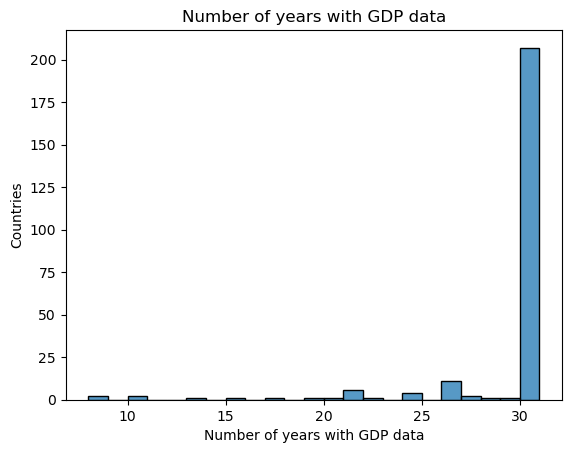

In [27]:
sns.histplot(data=country_count, bins=range(8, 32))
plt.xlabel('Number of years with GDP data')
plt.ylabel('Countries')
plt.title('Number of years with GDP data')

In [28]:
gdp_2020 = gdp_df[gdp_df['Year'] == 2020][['Country', 'GDP_Per_Capita']]

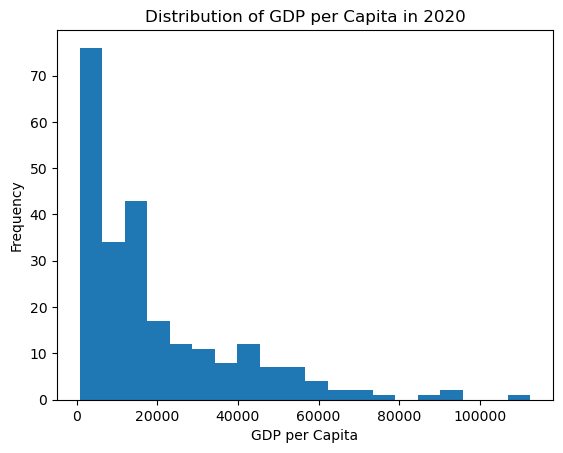

In [29]:
plt.hist(gdp_2020['GDP_Per_Capita'], bins=20)
plt.title("Distribution of GDP per Capita in 2020")
plt.xlabel("GDP per Capita")
plt.ylabel("Frequency")
plt.show()

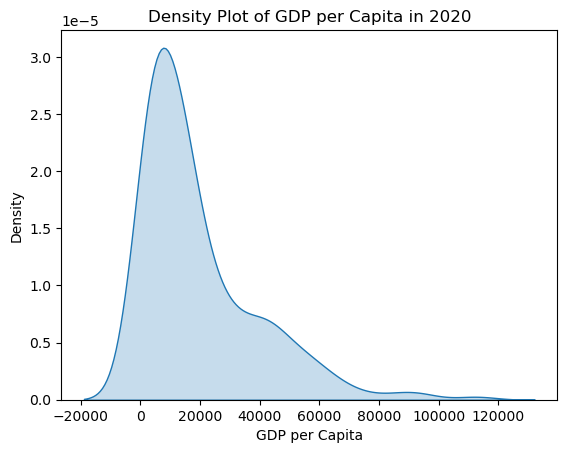

In [30]:
sns.kdeplot(data=gdp_2020, x='GDP_Per_Capita', fill=True)
plt.title("Density Plot of GDP per Capita in 2020")
plt.xlabel("GDP per Capita")
plt.show()

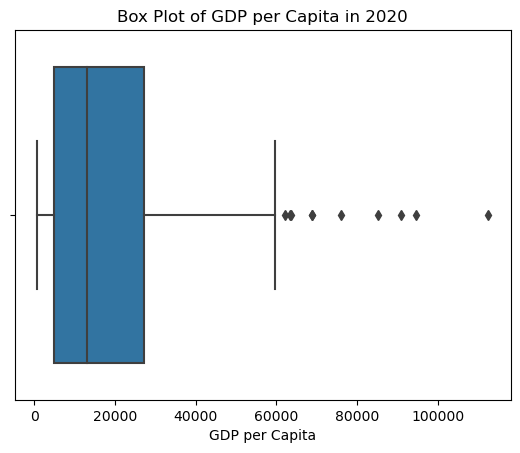

In [31]:
sns.boxplot(data=gdp_2020, x='GDP_Per_Capita')
plt.title("Box Plot of GDP per Capita in 2020")
plt.xlabel("GDP per Capita")
plt.show()

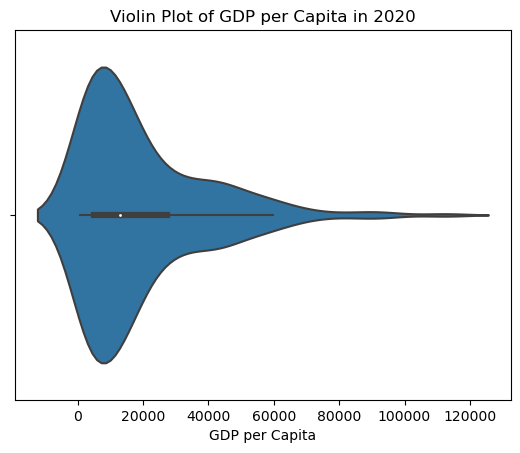

In [32]:
sns.violinplot(data=gdp_2020, x='GDP_Per_Capita')
plt.title("Violin Plot of GDP per Capita in 2020")
plt.xlabel("GDP per Capita")
plt.show()

Q8. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

A8. It looks like the boxplot would not be as sensitive to nuances in data 

________________________________________________________________
Q9. What was the median GDP per capita value in 2020?

In [33]:
median_gdp_2020 = gdp_2020['GDP_Per_Capita'].median()

In [34]:
median_gdp_2020

12908.9374056206

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.


In [35]:
##years = [1990, 2000, 2010, 2020]
##gdp_decades = gdp_df[gdp_df['Year'].isin(years)][['Country', 'Year', 'GDP_Per_Capita']] ##another way possibly##

In [36]:
gdp_decades = gdp_df.query("Year == 1990 | Year == 2000 | Year == 2010 | Year == 2020")[['Country', 'Year', 'GDP_Per_Capita']]

In [37]:
##Reminder that the second set of brackets or double brackets results in a dataframe rather than a series 

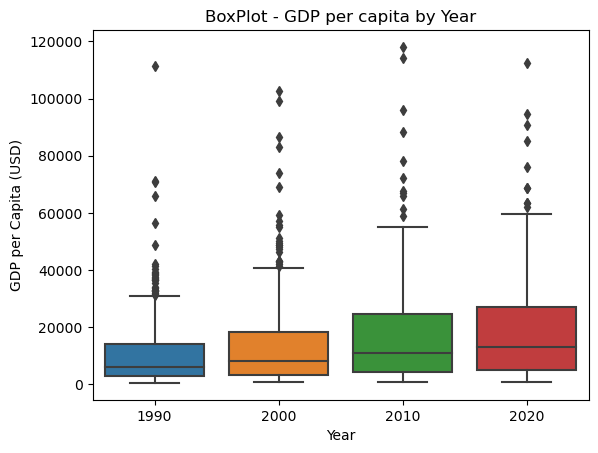

In [38]:
sns.boxplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')
plt.title('BoxPlot - GDP per capita by Year')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (USD)')
plt.show()

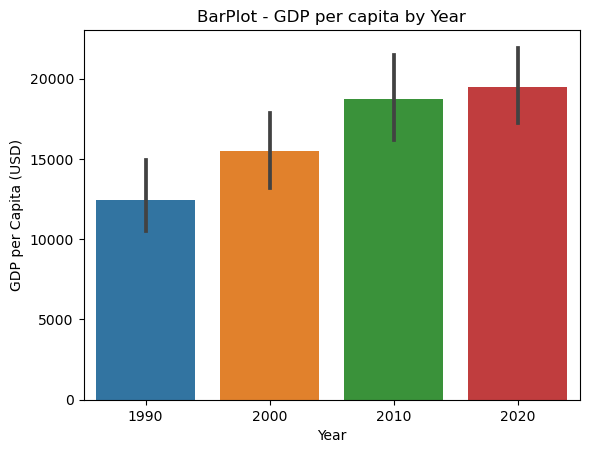

In [39]:
sns.barplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')
plt.title('BarPlot - GDP per capita by Year')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (USD)')
plt.show()

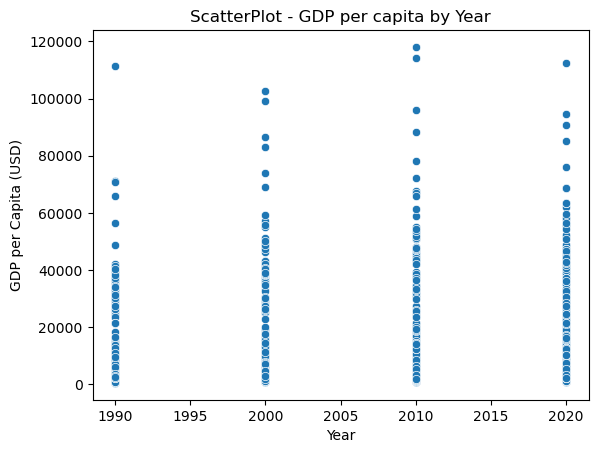

In [40]:
sns.scatterplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')
plt.title('ScatterPlot - GDP per capita by Year')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (USD)')
plt.show()

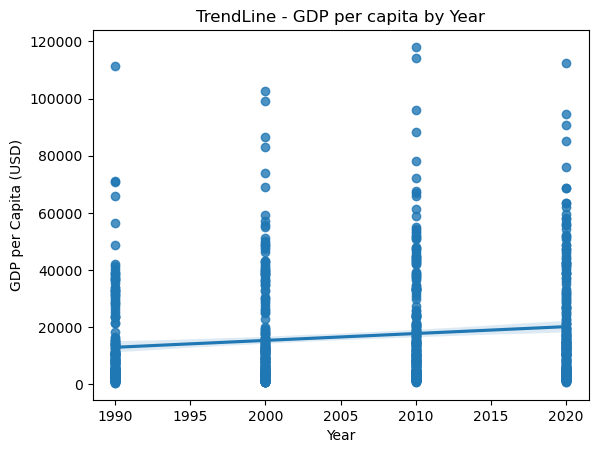

In [41]:
sns.regplot(data=gdp_decades, x='Year', y='GDP_Per_Capita')
plt.title('TrendLine - GDP per capita by Year')
plt.xlabel('Year')
plt.ylabel('GDP per Capita (USD)')
plt.show()

##GDP has continued to increase over time; As for the plots, I really can't fully understand how to interpret them.  The scatterplot lets me interpret the data the best.  I suspect that the barplot is the hardest to interpret.

Q11. Which country was the first to have a GDP per capita greater than $100,000?

A11. United Arab Emirates    1990

In [42]:
gdp_high = gdp_df[gdp_df['GDP_Per_Capita'] > 100000]
first_to100 = gdp_high.groupby('Country')['Year'].min()
earliest_years = first_to100.sort_values()

In [43]:
earliest_years

Country
United Arab Emirates    1990
Luxembourg              2001
Macao SAR, China        2010
Name: Year, dtype: int64

___________________________
Q12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

A12.

In [44]:
highest_gdp = gdp_2020.loc[gdp_2020['GDP_Per_Capita'].idxmax()]

In [45]:
highest_gdp

Country              Luxembourg
GDP_Per_Capita    112557.309472
Name: 3882, dtype: object

Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [46]:
luxembourg_gdp = gdp_df[gdp_df['Country'] == 'Luxembourg']

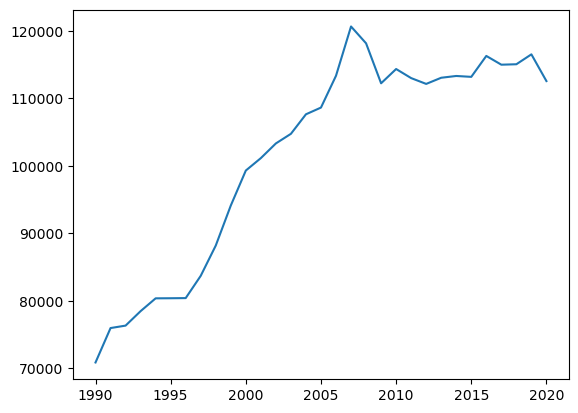

In [47]:
plt.plot(luxembourg_gdp['Year'], luxembourg_gdp['GDP_Per_Capita'])

Q13. Which country had the lowest GDP per capita in 2020? 

In [48]:
lowest_gdp = gdp_2020.loc[gdp_2020['GDP_Per_Capita'].idxmin()]

In [49]:
lowest_gdp

Country              Burundi
GDP_Per_Capita    731.064074
Name: 914, dtype: object

In [50]:
burundi_gdp = gdp_df[gdp_df['Country'] == 'Burundi']

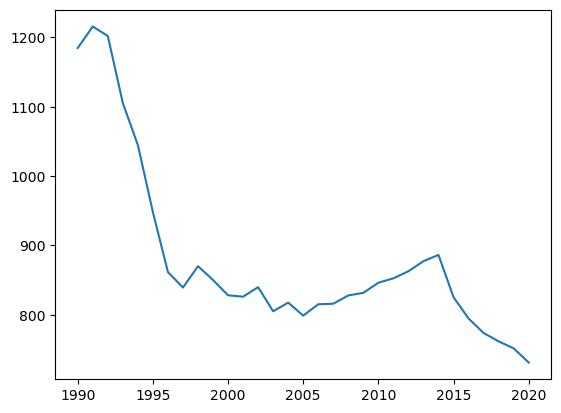

In [51]:
plt.plot(burundi_gdp['Year'], burundi_gdp['GDP_Per_Capita'])

In [52]:
gdp_filtered = gdp_df[gdp_df['Year'].isin([1990, 2020])]

<Axes: xlabel='GDP_Per_Capita', ylabel='GDP_Per_Capita'>

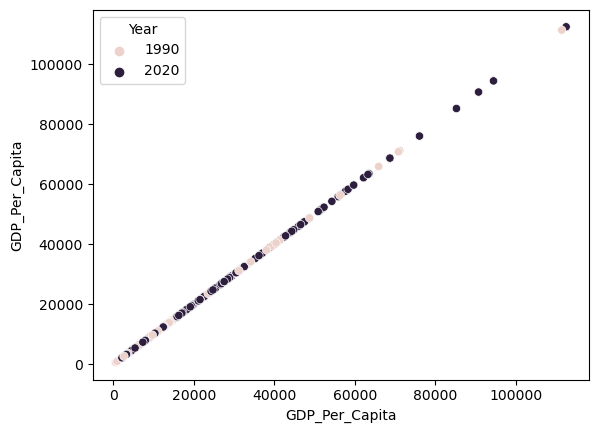

In [53]:
sns.scatterplot(data=gdp_filtered, x='GDP_Per_Capita', y='GDP_Per_Capita', hue='Year')

In [54]:
gdp_mean = gdp_filtered.groupby('Year')['GDP_Per_Capita'].mean()


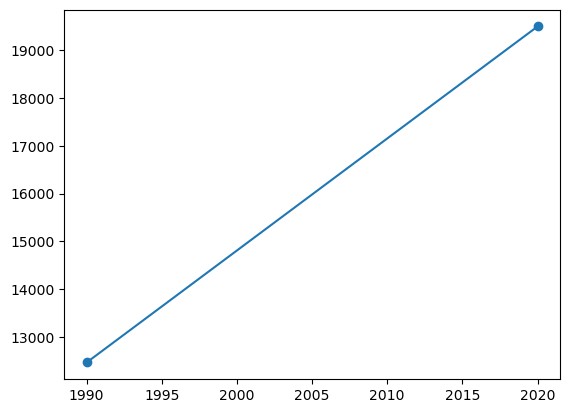

In [55]:
plt.plot(gdp_mean.index, gdp_mean.values, marker='o')


In [56]:
gdp_pivot = gdp_filtered.pivot(index='Country', columns='Year', values='GDP_Per_Capita')

In [57]:
gdp_diff = gdp_pivot[2020] - gdp_pivot[1990]

In [58]:
lower_gdp_countries = gdp_diff[gdp_diff < 0].index.tolist()

In [59]:
lower_gdp_countries

['Aruba',
 'Barbados',
 'Brunei',
 'Burundi',
 'Central African Republic',
 'Comoros',
 'Congo',
 'Dem. Rep. Congo',
 'Fragile and conflict affected situations',
 'Gabon',
 'Guinea-Bissau',
 'Haiti',
 'Kiribati',
 'Kyrgyz Republic',
 'Madagascar',
 'Oman',
 'Tajikistan',
 'The Bahamas',
 'The Gambia',
 'Ukraine',
 'United Arab Emirates',
 'Zimbabwe']

Q14. 

In [60]:
internet_df = pd.read_csv('..\data\internet_use.csv') #left error message included intentionally 

ParserError: Error tokenizing data. C error: Expected 4 fields in line 4675, saw 6


In [68]:
internet_df=pd.read_csv('..\data\internet_use.csv', delimiter=',', on_bad_lines='skip') ##corrected the error above here

In [69]:
print(internet_df.head())

  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN


In [70]:
print(internet_df.tail())

     Country or Area                                               Year  \
4670             175             Includes individuals 3 years and older   
4671             176                                   NTIA/CPS survey.   
4672             178  Estimated based on Survey's results. Populatio...   
4673             179                     Preliminary. Country estimate.   
4674             180  The methodology used to estimated the figure f...   

      Value  Value Footnotes  
4670    NaN              NaN  
4671    NaN              NaN  
4672    NaN              NaN  
4673    NaN              NaN  
4674    NaN              NaN  


In [71]:
print(internet_df.describe())

             Value  Value Footnotes
count  4495.000000       948.000000
mean     18.675495        52.663502
std      25.091999        52.390698
min       0.000000         1.000000
25%       0.346593         7.000000
50%       5.265683        25.000000
75%      30.581020        93.000000
max      98.160000       180.000000


In [72]:
print(internet_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675 entries, 0 to 4674
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4675 non-null   object 
 1   Year             4675 non-null   object 
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), object(2)
memory usage: 146.2+ KB
None


Q15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [73]:
internet_df.drop('Value Footnotes', axis=1, inplace=True)
internet_df = internet_df.rename(columns={'Country or Area':'Country', 'Value':'Internet_Users_Pct'})

In [74]:
print(internet_df.head())

       Country  Year  Internet_Users_Pct
0  Afghanistan  2014            6.390000
1  Afghanistan  2013            5.900000
2  Afghanistan  2012            5.454545
3  Afghanistan  2011            5.000000
4  Afghanistan  2010            4.000000


In [ ]:
##inplace=True instead of renaming the dataset to get results

Q16.Look at the number of observations in this dataset per year. What do you notice?

In [75]:
obs_per_year = internet_df['Year'].value_counts()

In [76]:
print(obs_per_year)

1990                                                                                                                                                                                                                                                                                                                                                       210
2011                                                                                                                                                                                                                                                                                                                                                       207
2007                                                                                                                                                                                                                                                                                                      

Q17. What is the first year to have a non-zero internet users percentage value?

In [77]:
first_year = internet_df.loc[internet_df['Internet_Users_Pct'] > 0, 'Year'].min()

In [78]:
print(first_year)

1990


Q18. How does the distribution of internet users percent differ for 2000 and 2014?

In [83]:
internet_2000 = internet_df[(internet_df['Year'] == 2000) & (internet_df['Internet_Users_Pct'].notna())]
internet_2014 = internet_df[(internet_df['Year'] == 2014) & (internet_df['Internet_Users_Pct'].notna())]

In [84]:
mean_2000 = internet_2000['Internet_Users_Pct'].mean()
std_2000 = internet_2000['Internet_Users_Pct'].std()

mean_2014 = internet_2014['Internet_Users_Pct'].mean()
std_2014 = internet_2014['Internet_Users_Pct'].std()

print("2000: Mean = {:.2f}, Standard Deviation = {:.2f}".format(mean_2000, std_2000))
print("2014: Mean = {:.2f}, Standard Deviation = {:.2f}".format(mean_2014, std_2014))

2000: Mean = nan, Standard Deviation = nan
2014: Mean = nan, Standard Deviation = nan


Q19. For how many countries was the percentage of internet users below 5% in 2014?

In [87]:
internet_2014 = internet_df[(internet_df['Year'] == 2014) & (internet_df['Internet_Users_Pct'].notnull())]['Internet_Users_Pct']
num_countries_below_5_percent = sum(internet_2014 < 5)

In [88]:
print("The number of countries with less than 5% internet users in 2014 is: {}".format(num_countries_below_5_percent))

The number of countries with less than 5% internet users in 2014 is: 0


Q20. Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.


In [90]:
print(gdp_df['Year'].dtypes)
print(internet_df['Year'].dtypes)

int64
object


internet_df['Year'] = internet_df['Year'].astype(int) ##didn't work

In [92]:
internet_df['Year'] = pd.to_numeric(internet_df['Year'], errors='coerce')

In [93]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=['Country', 'Year'], how='outer')

In [94]:
print(gdp_and_internet_use.head())
print(gdp_and_internet_use.tail())

       Country    Year  GDP_Per_Capita  Internet_Users_Pct
0  Afghanistan  2020.0     1970.560169                 NaN
1  Afghanistan  2019.0     2065.036235                 NaN
2  Afghanistan  2018.0     2033.804389                 NaN
3  Afghanistan  2017.0     2058.400221                 NaN
4  Afghanistan  2016.0     2057.067978                 NaN
     Country  Year  GDP_Per_Capita  Internet_Users_Pct
8431     175   NaN             NaN                 NaN
8432     176   NaN             NaN                 NaN
8433     178   NaN             NaN                 NaN
8434     179   NaN             NaN                 NaN
8435     180   NaN             NaN                 NaN


Q21. Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?

Q22. Subset `gdp_and_internet_use` to just the year 2014. Save this as a new dataframe named `gdp_and_internet_use_2014`.

Q23. Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.

Q24. **Stretch Question:** Use the `qcut` function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in `gdp_per_capita_2014` into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".

Q25. **Stretch Question:** How does the median internet users percentage compare for the three gdp groups?